## Context

Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing, and digital marketing.

Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).

## Detailed Column Descriptions

### Bank client data:

1 - age (numeric)  
2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")  
3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
4 - education (categorical: "unknown","secondary","primary","tertiary")  
5 - default: has credit in default? (binary: "yes","no")  
6 - balance: average yearly balance, in euros (numeric)  
7 - housing: has housing loan? (binary: "yes","no")  
8 - loan: has personal loan? (binary: "yes","no")
### Related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: "unknown","telephone","cellular")  
10 - day: last contact day of the month (numeric)  
11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")  
12 - duration: last contact duration, in seconds (numeric)
### Other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
15 - previous: number of contacts performed before this campaign and for this client (numeric)  
16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

### Output variable (desired target):
17 - y - has the client subscribed a term deposit? (binary: "yes","no")

**Dataset Link**: https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets

In [646]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

## Loading the dataset into a pandas dataframe

In [567]:
# The data is divided into train and test. It will be loaded into one, because we will be doing K-Fold Cross Validation
marketing_data_train = pd.read_csv('dataset/banking-dataset-marketing-targets-train.csv', sep=';')
marketing_data_test = pd.read_csv('dataset/banking-dataset-marketing-targets-test.csv', sep=';')

In [568]:
# Checking shapes
print(marketing_data_train.shape, marketing_data_test.shape)

(45211, 17) (4521, 17)


In [569]:
# Checking data consistency in both dataframes.
marketing_data_train.dtypes.equals(marketing_data_test.dtypes)

True

In [570]:
# Concatenating both dataframes
marketing_data = pd.concat([marketing_data_train, marketing_data_test], axis=0, ignore_index=True)

In [571]:
# Checking shape
marketing_data.shape

(49732, 17)

In [572]:
# Checking first 5 rows
marketing_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [573]:
marketing_data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
49731,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


## Exploratory Analysis

In [574]:
print(marketing_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB
None


In [575]:
marketing_data.describe(include="all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,49732.000000,49732,49732,49732,49732,49732.000000,49732,49732,49732,49732.000000,49732,49732.000000,49732.000000,49732.000000,49732.000000,49732,49732
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,10678,30011,25508,48841,NaN,27689,41797,32181,NaN,15164,NaN,NaN,NaN,NaN,40664,43922
mean,40.957472,NaN,NaN,NaN,NaN,1367.761562,NaN,NaN,NaN,15.816315,NaN,258.690179,2.766549,40.158630,0.576892,NaN,NaN
std,10.615008,NaN,NaN,NaN,NaN,3041.608766,NaN,NaN,NaN,8.315680,NaN,257.743149,3.099075,100.127123,2.254838,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1431.000000,NaN,NaN,NaN,21.000000,NaN,320.000000,3.000000,-1.000000,0.000000,NaN,NaN


- No missing data. 
- Columns are a mix of numbers and text.

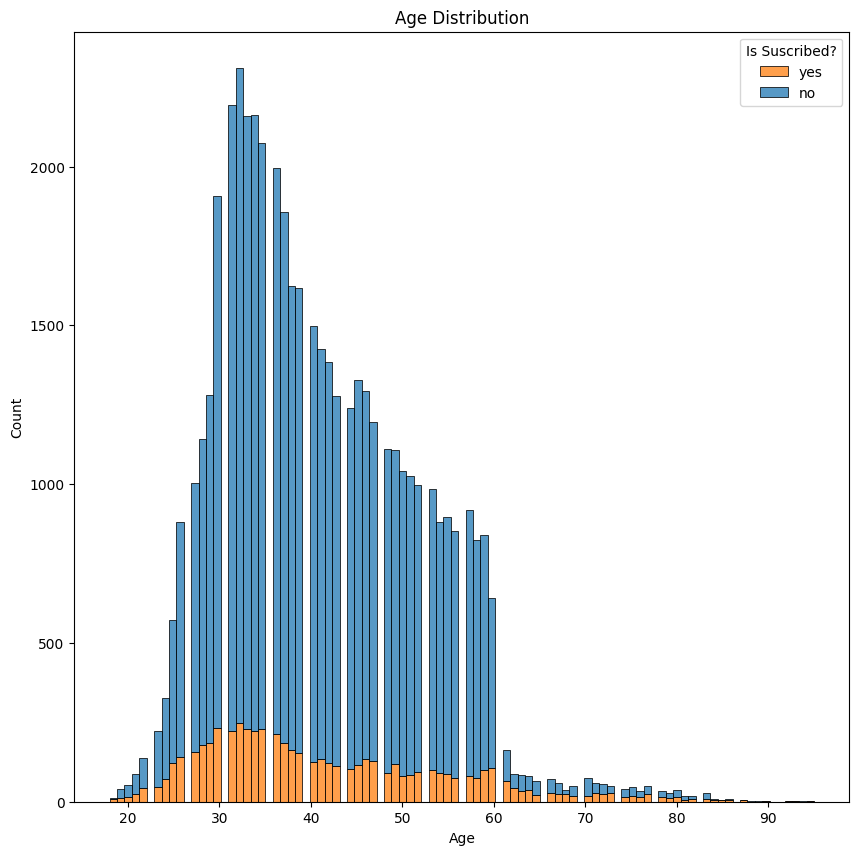

In [576]:
# Age
plt.figure(figsize=(10, 10))
sns.histplot(data=marketing_data, x='age', hue='y', multiple='stack')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(labels=["yes","no"], title = "Is Suscribed?")
plt.show()

**Roughly the same distribution of age for people who have subscribed to term deposit and people who hasn't.**

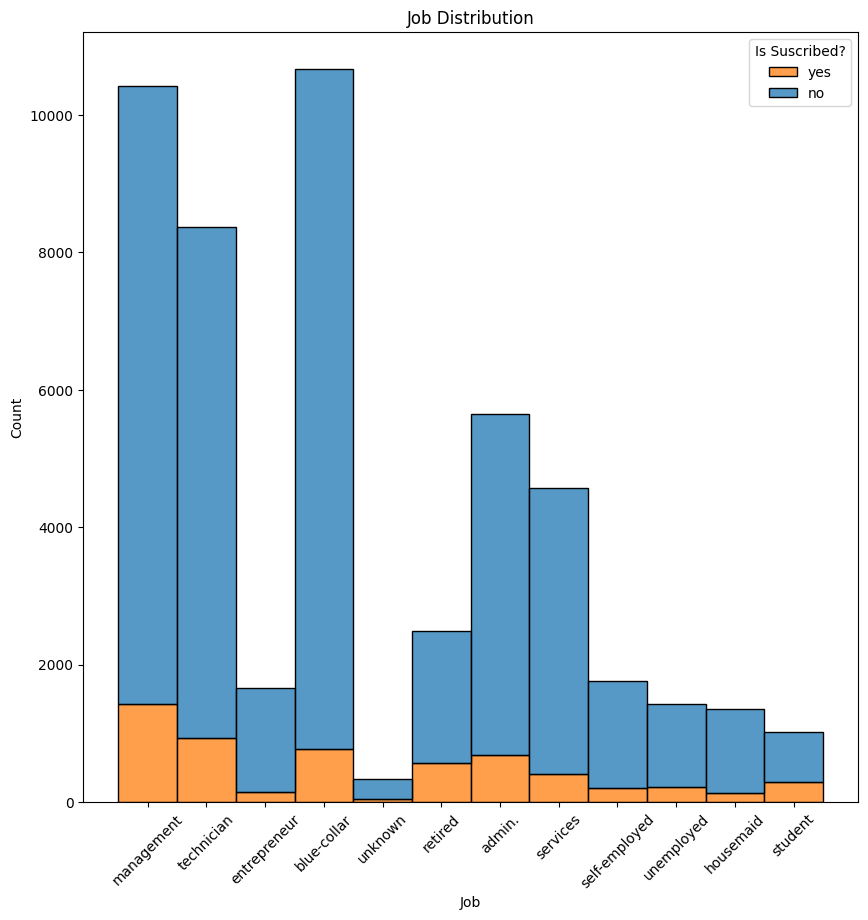

In [577]:
# Job
plt.figure(figsize=(10, 10))
sns.histplot(data=marketing_data, x='job', hue='y', multiple='stack')
plt.title('Job Distribution')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(labels=["yes","no"], title = "Is Suscribed?")
plt.show()

**Roughly the same distribution of job for people who have subscribed to term deposit and people who hasn't.**

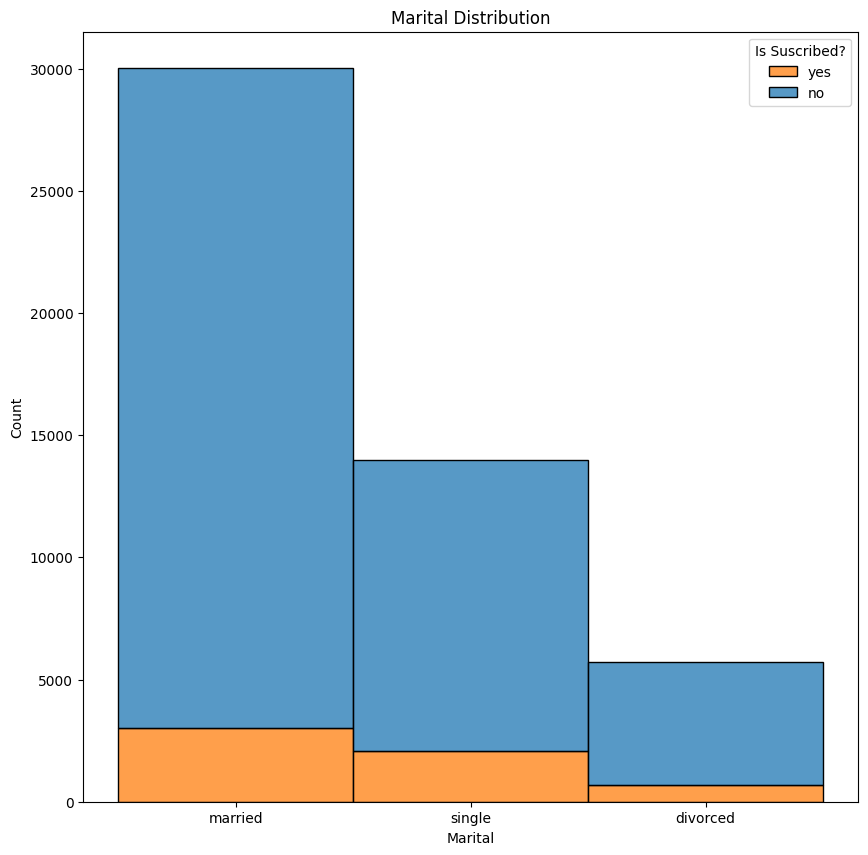

In [578]:
# Marital
plt.figure(figsize=(10, 10))
sns.histplot(data=marketing_data, x='marital', hue='y', multiple='stack')
plt.title('Marital Distribution')
plt.xlabel('Marital')
plt.ylabel('Count')
plt.legend(labels=["yes","no"], title = "Is Suscribed?")
plt.show()

**Roughly the same distribution of marital for people who have subscribed to term deposit and people who hasn't.  
Most calls were made to married people.**

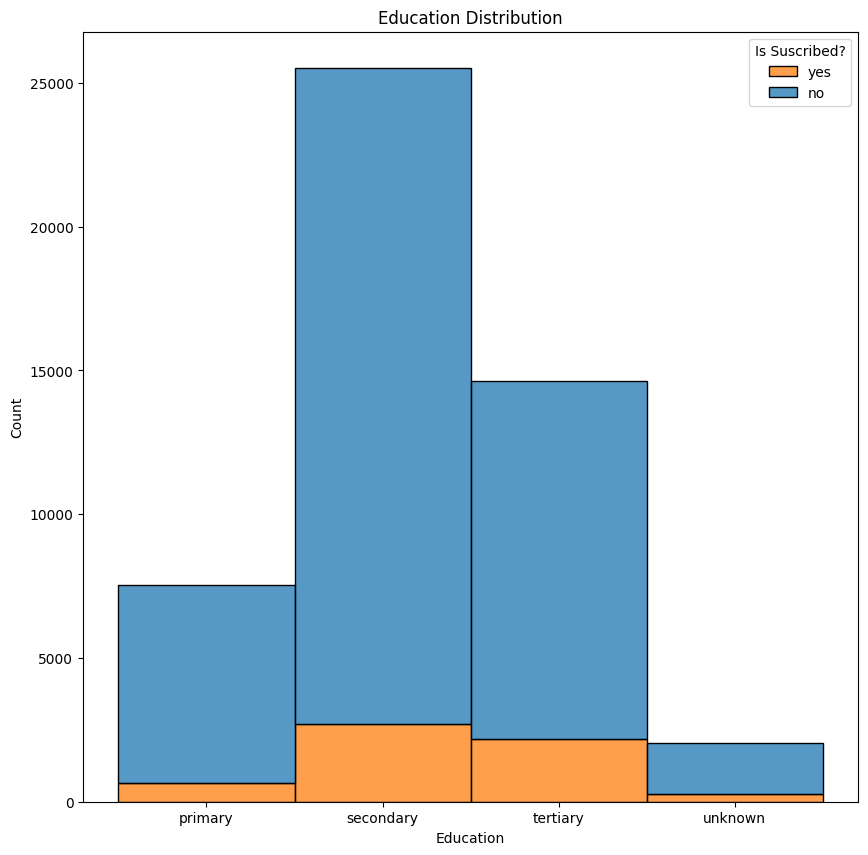

In [579]:
# Education
education_order = ['primary', 'secondary', 'tertiary', 'unknown']
# The lambda function in sort_values takes the column education as "x", so to this column we apply another lambda function to order according to the index in the list.
marketing_data_ordered_by_education = marketing_data.sort_values(by='education', key=lambda x: x.apply(lambda y: education_order.index(y)))

plt.figure(figsize=(10, 10))
sns.histplot(data=marketing_data_ordered_by_education, x='education', hue='y', multiple='stack')
plt.title('Education Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(labels=["yes","no"], title = "Is Suscribed?")
plt.show()

**Roughly the same distribution of education for people who have subscribed to term deposit and people who hasn't.**

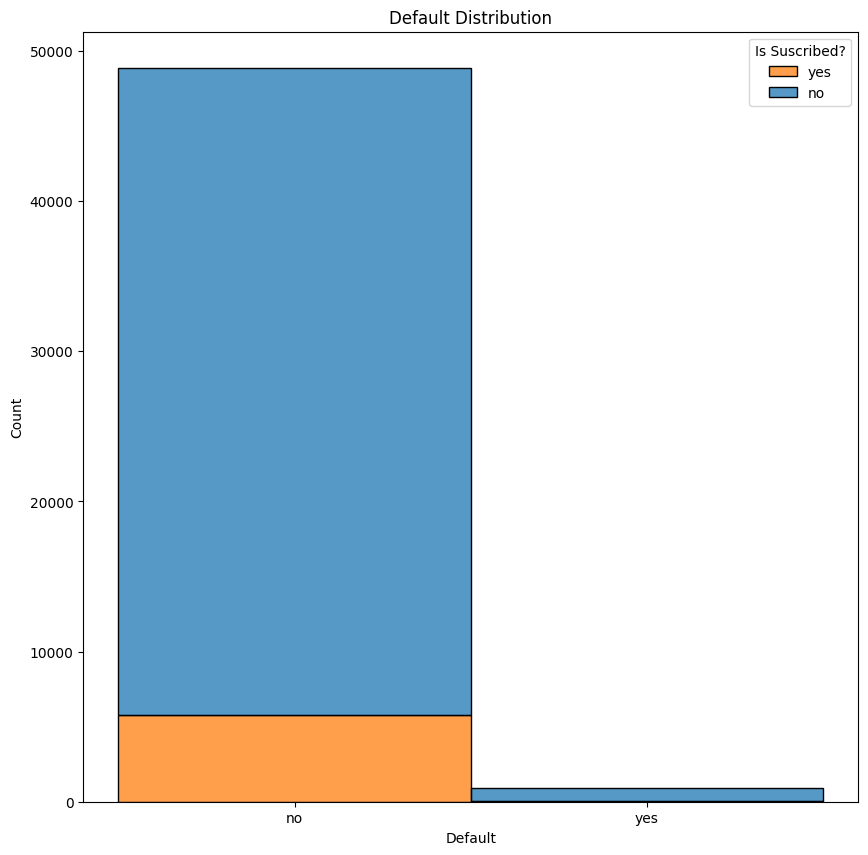

In [580]:
# Default
plt.figure(figsize=(10, 10))
sns.histplot(data=marketing_data, x='default', hue='y', multiple='stack')
plt.title('Default Distribution')
plt.xlabel('Default')
plt.ylabel('Count')
plt.legend(labels=["yes","no"], title = "Is Suscribed?")
plt.show()

**A higher proportion of people subscribed to a term deposit is observed in people without credit on default.**

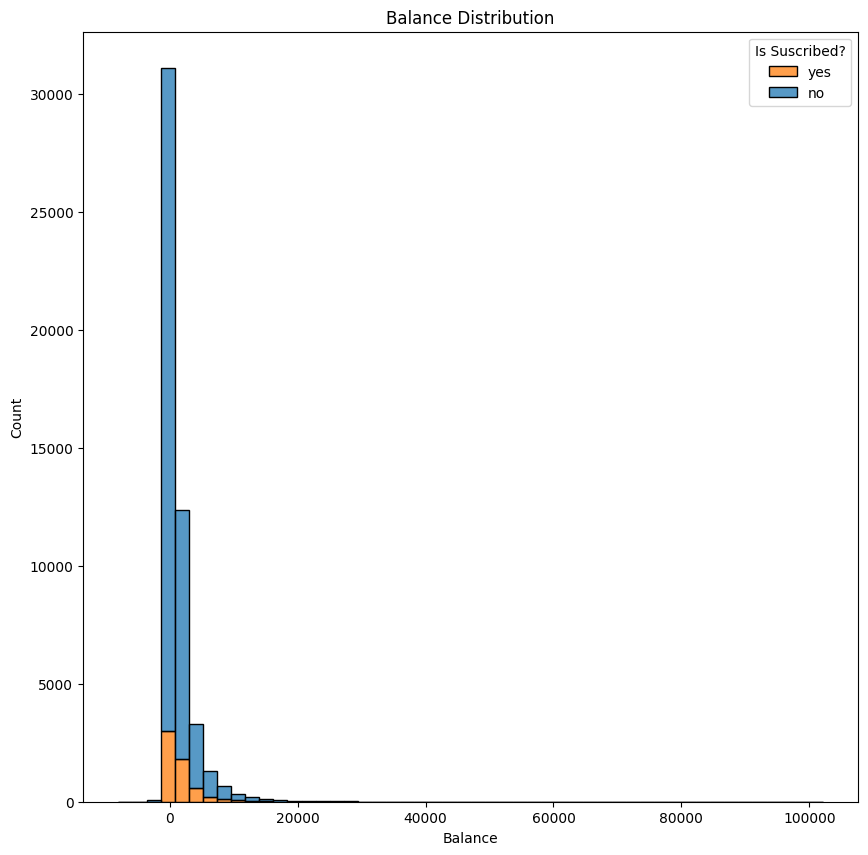

In [581]:
# Balance
plt.figure(figsize=(10, 10))
sns.histplot(data=marketing_data, x='balance', hue='y', multiple='stack', bins=50)
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.legend(labels=["yes","no"], title = "Is Suscribed?")
plt.show()

**Roughly the same distribution of balance for people who have subscribed to term deposit and people who hasn't.**

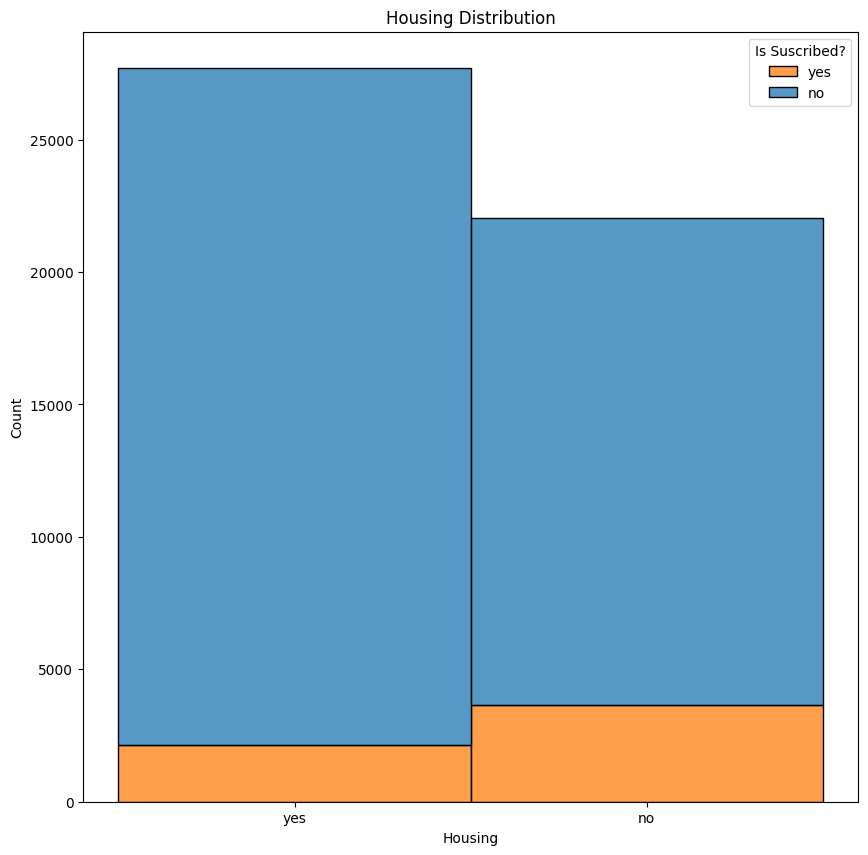

In [582]:
# Housing
plt.figure(figsize=(10, 10))
sns.histplot(data=marketing_data, x='housing', hue='y', multiple='stack')
plt.title('Housing Distribution')
plt.xlabel('Housing')
plt.ylabel('Count')
plt.legend(labels=["yes","no"], title = "Is Suscribed?")
plt.show()

**Slightly higher proportion of people who accepted the term deposit on people without a house loan**

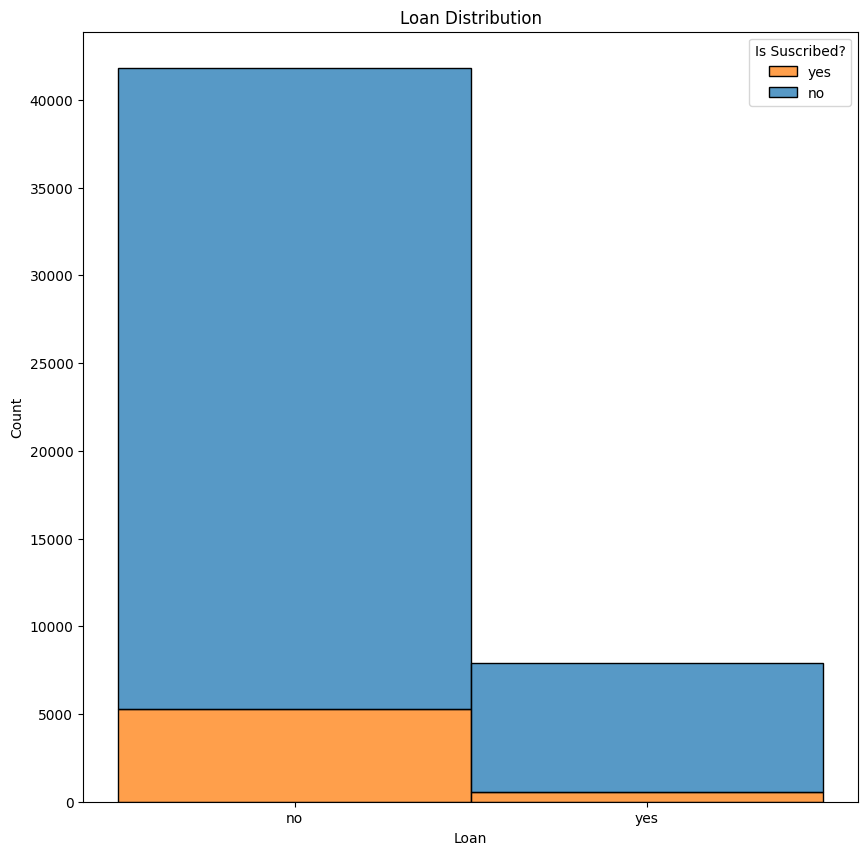

In [583]:
# Loan
plt.figure(figsize=(10, 10))
sns.histplot(data=marketing_data, x='loan', hue='y', multiple='stack')
plt.title('Loan Distribution')
plt.xlabel('Loan')
plt.ylabel('Count')
plt.legend(labels=["yes","no"], title = "Is Suscribed?")
plt.show()

**Roughly the same distribution of people with and without a loan for people who have subscribed to term deposit and people who hasn't.**

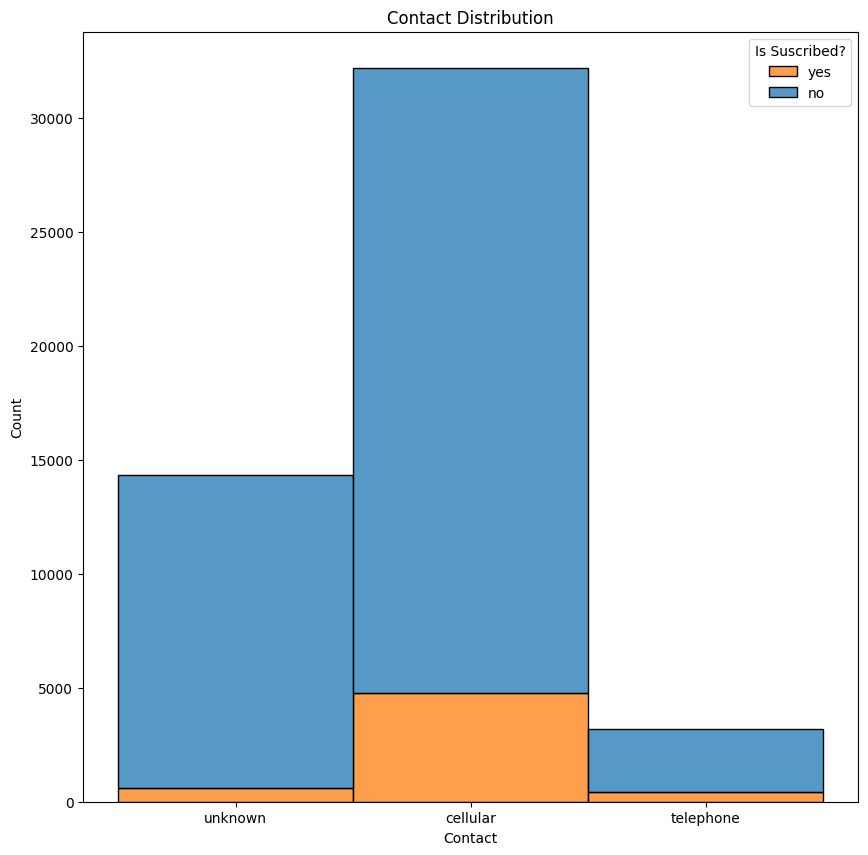

In [584]:
# Contact
plt.figure(figsize=(10, 10))
sns.histplot(data=marketing_data, x='contact', hue='y', multiple='stack')
plt.title('Contact Distribution')
plt.xlabel('Contact')
plt.ylabel('Count')
plt.legend(labels=["yes","no"], title = "Is Suscribed?")
plt.show()

**Roughly the same distribution for contact method for people who have subscribed to term deposit and people who hasn't.**

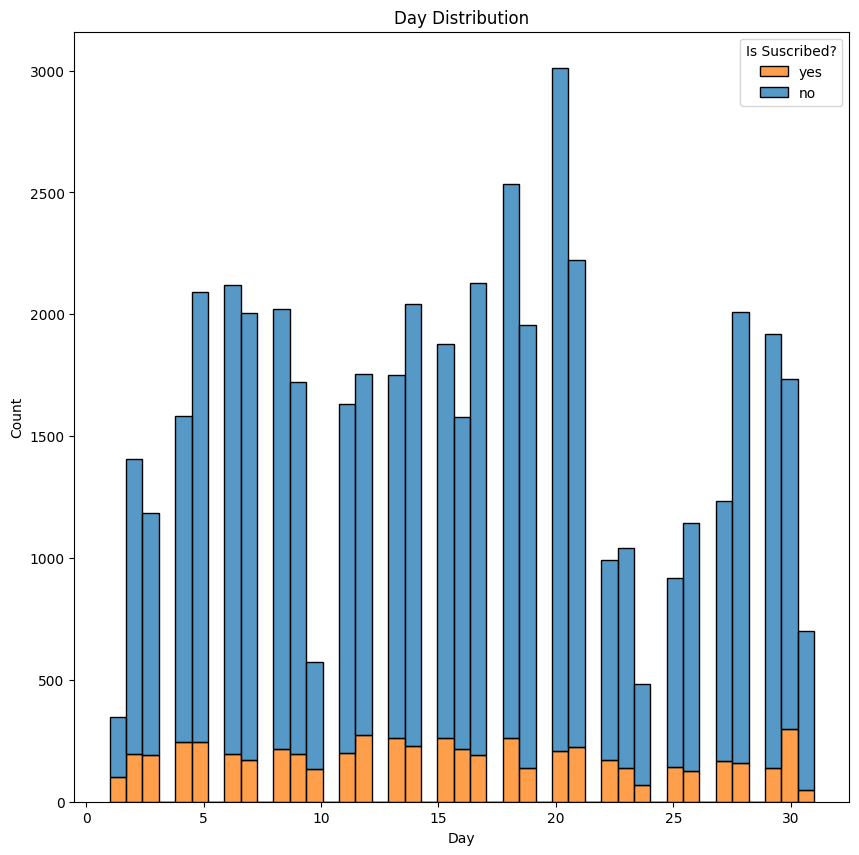

In [585]:
# Day
plt.figure(figsize=(10, 10))
sns.histplot(data=marketing_data, x='day', hue='y', multiple='stack')
plt.title('Day Distribution')
plt.xlabel('Day')
plt.ylabel('Count')
plt.legend(labels=["yes","no"], title = "Is Suscribed?")
plt.show()

**Roughly the same distribution of contact day for people who have subscribed to term deposit and people who hasn't.**

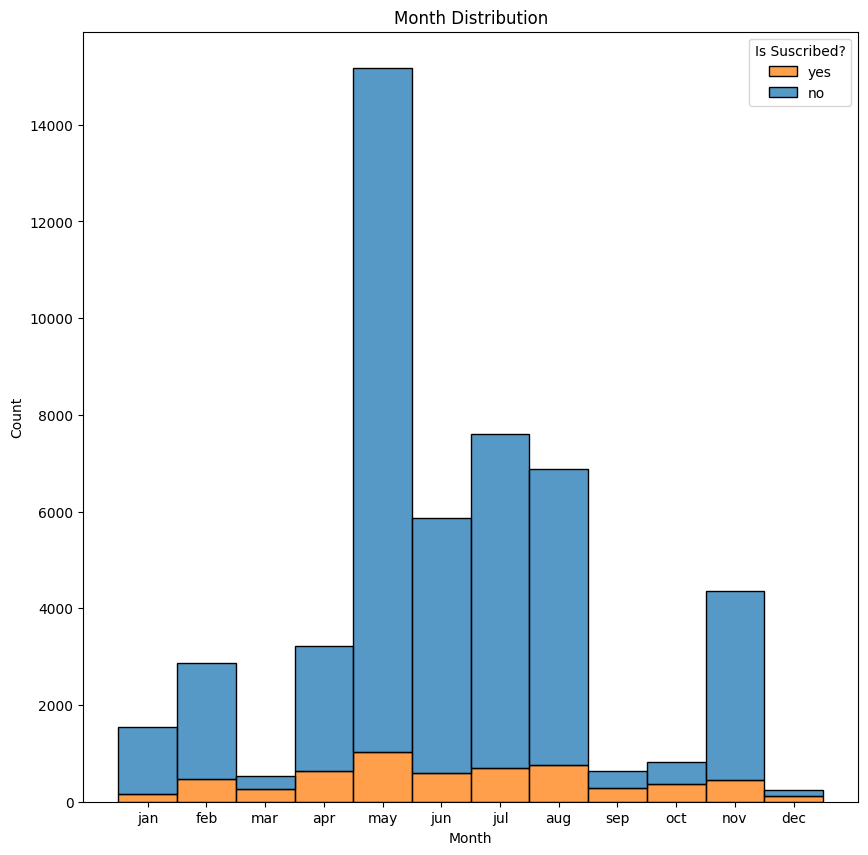

In [586]:
# Month
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
# Explanation of the line below: 
# The lambda function in sort_values takes the column month as "x", so to this column we apply another lambda function to order according to the index in the list.
marketing_data_ordered_by_month = marketing_data.sort_values(by='month', key=lambda x: x.apply(lambda y: month_order.index(y)))


plt.figure(figsize=(10, 10))
sns.histplot(data=marketing_data_ordered_by_month, x='month', hue='y', multiple='stack')
plt.title('Month Distribution')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(labels=["yes","no"], title = "Is Suscribed?")
plt.show()

**Roughly the same distribution of contact month for people who have subscribed to term deposit and people who hasn't.**

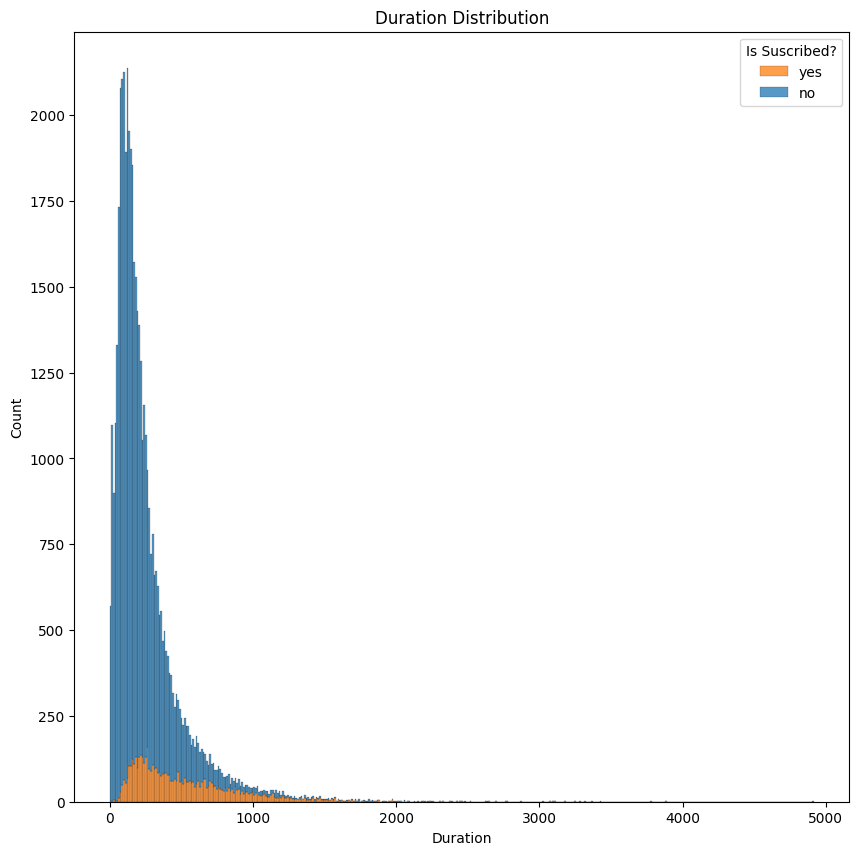

In [587]:
# Duration
plt.figure(figsize=(10, 10))
sns.histplot(data=marketing_data, x='duration', hue='y', multiple='stack')
plt.title('Duration Distribution')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.legend(labels=["yes","no"], title = "Is Suscribed?")
plt.show()

**Roughly the same distribution of call duration for people who have subscribed to term deposit and people who hasn't.**

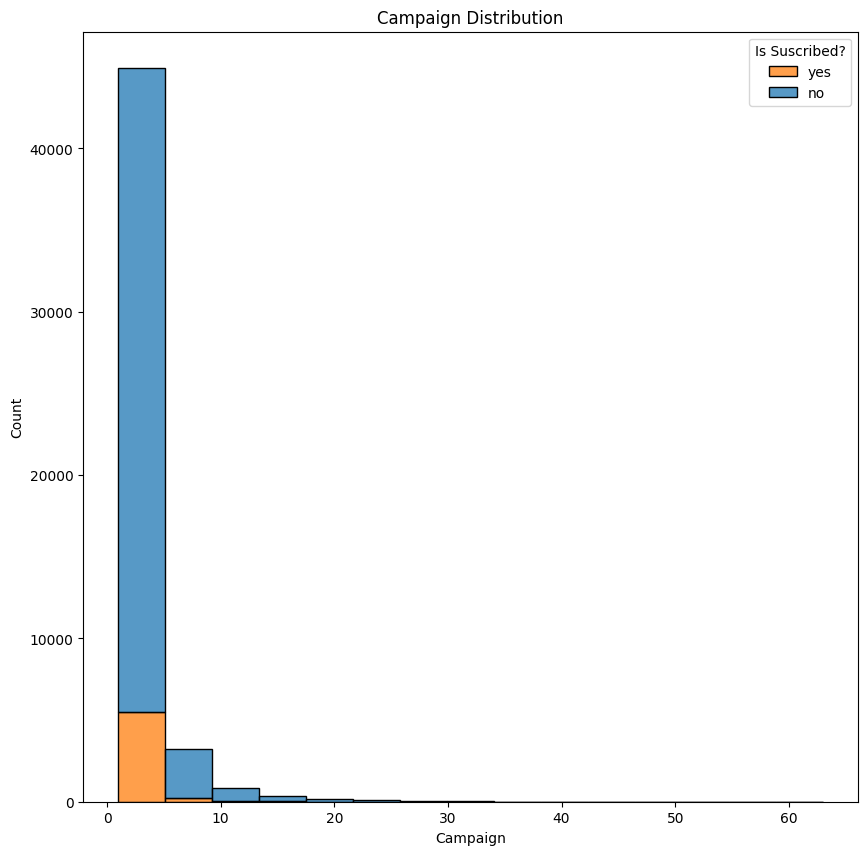

In [588]:
# Campaign
plt.figure(figsize=(10, 10))
sns.histplot(data=marketing_data, x='campaign', hue='y', multiple='stack', bins=15)
plt.title('Campaign Distribution')
plt.xlabel('Campaign')
plt.ylabel('Count')
plt.legend(labels=["yes","no"], title = "Is Suscribed?")
plt.show()

**Roughly the same distribution of the number of contact for people who have subscribed to term deposit and people who hasn't.**  
**It doesn't seem to be a benefit for incireasing the number of contacts.**

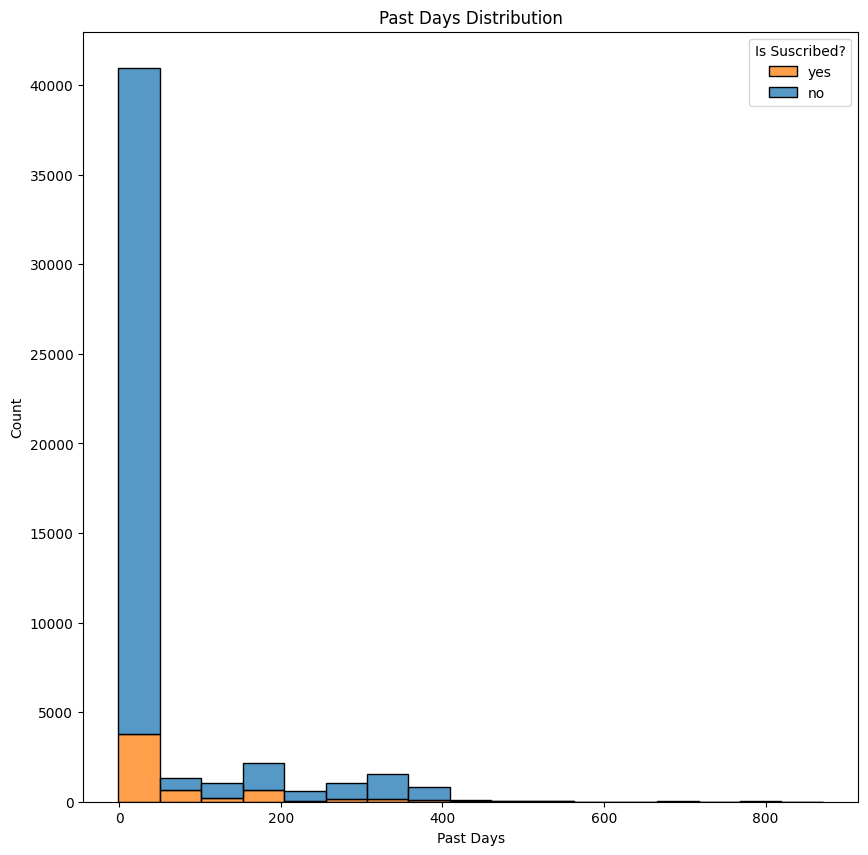

In [589]:
# pdays
plt.figure(figsize=(10, 10))
sns.histplot(data=marketing_data, x='pdays', hue='y', multiple='stack')
plt.title('Past Days Distribution')
plt.xlabel('Past Days')
plt.ylabel('Count')
plt.legend(labels=["yes","no"], title = "Is Suscribed?")
plt.show()

**Roughly the same distribution for the number of days of last contact for people who have subscribed to term deposit and people who hasn't.** 

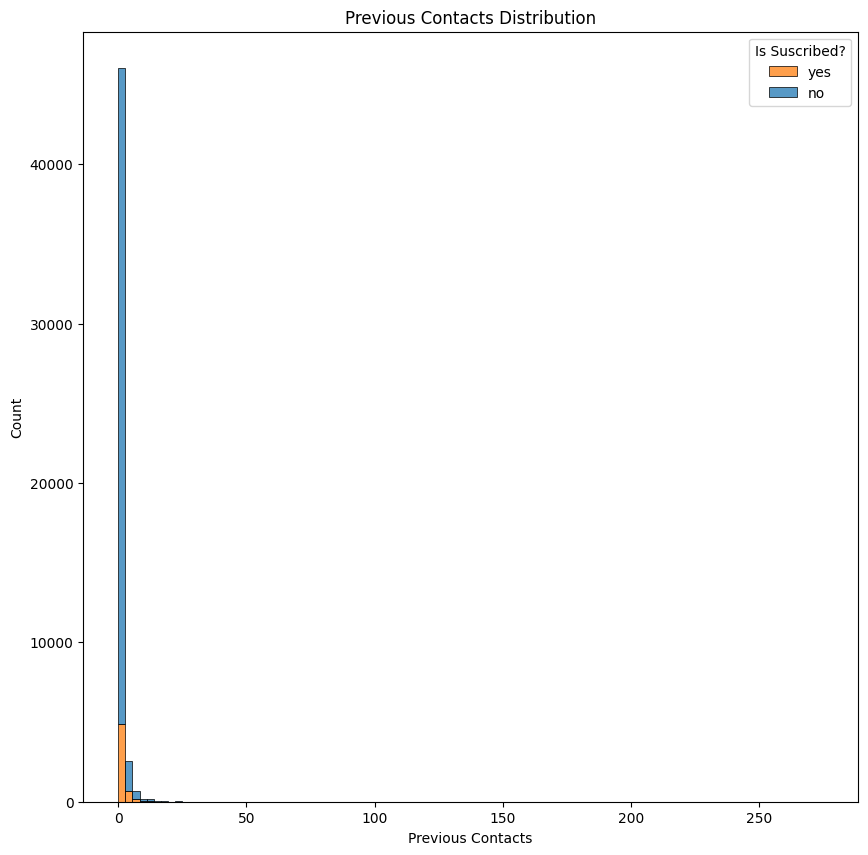

In [590]:
# previous
plt.figure(figsize=(10, 10))
sns.histplot(data=marketing_data, x='previous', hue='y', multiple='stack', bins=100)
plt.title('Previous Contacts Distribution')
plt.xlabel('Previous Contacts')
plt.ylabel('Count')
plt.legend(labels=["yes","no"], title = "Is Suscribed?")
plt.show()

**Roughly the same distribution for the number of previous contacts for people who have subscribed to term deposit and people who hasn't.** 
**Doesn't seem to be much benefit in contacting same people again.**

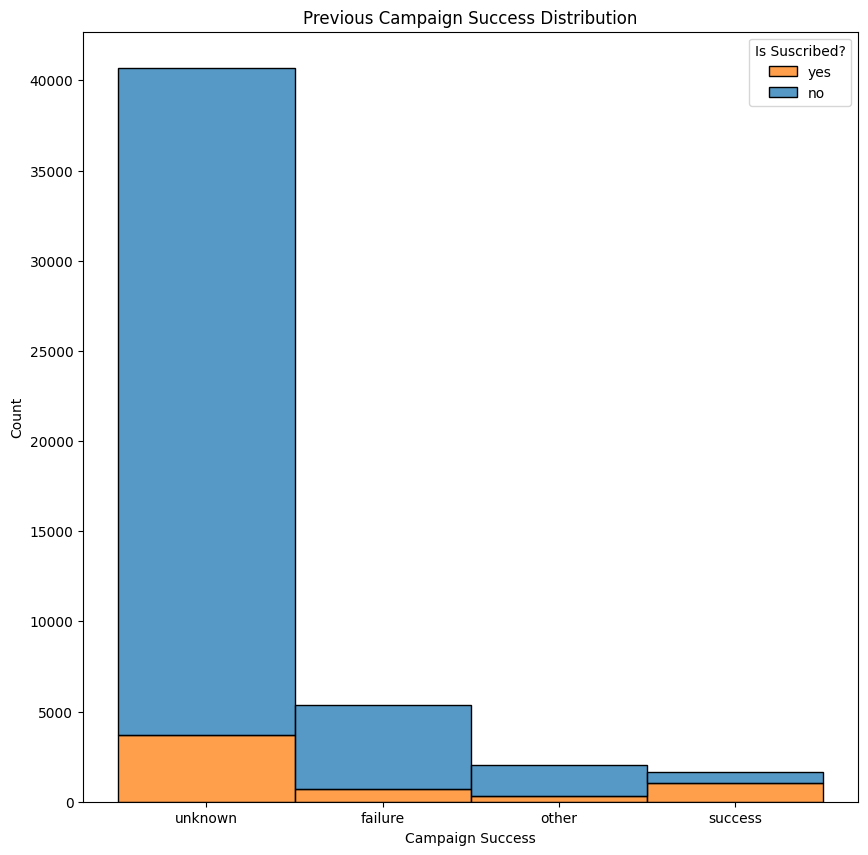

In [591]:
# poutcome
plt.figure(figsize=(10, 10))
sns.histplot(data=marketing_data, x='poutcome', hue='y', multiple='stack', bins=100)
plt.title('Previous Campaign Success Distribution')
plt.xlabel('Campaign Success')
plt.ylabel('Count')
plt.legend(labels=["yes","no"], title = "Is Suscribed?")
plt.show()

**Roughly the same distribution for the number of previous contacts for people who have subscribed to term deposit and people who hasn't.** 
**Previous campaign success cases, seem to have a higher success rate, which means contacting clients that took term deposits before could be beneficial.**

### Correlation Matrix

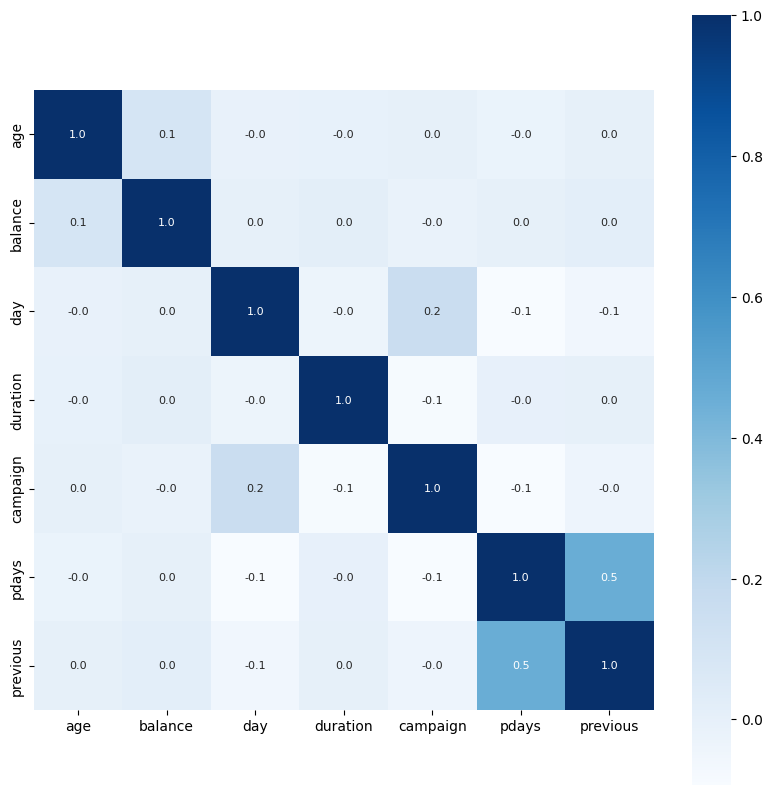

In [592]:
# Constructing heat map
correlation = marketing_data.corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues' )
plt.show()

**No strong correlation between numeric columns**

## Distribution of target variable

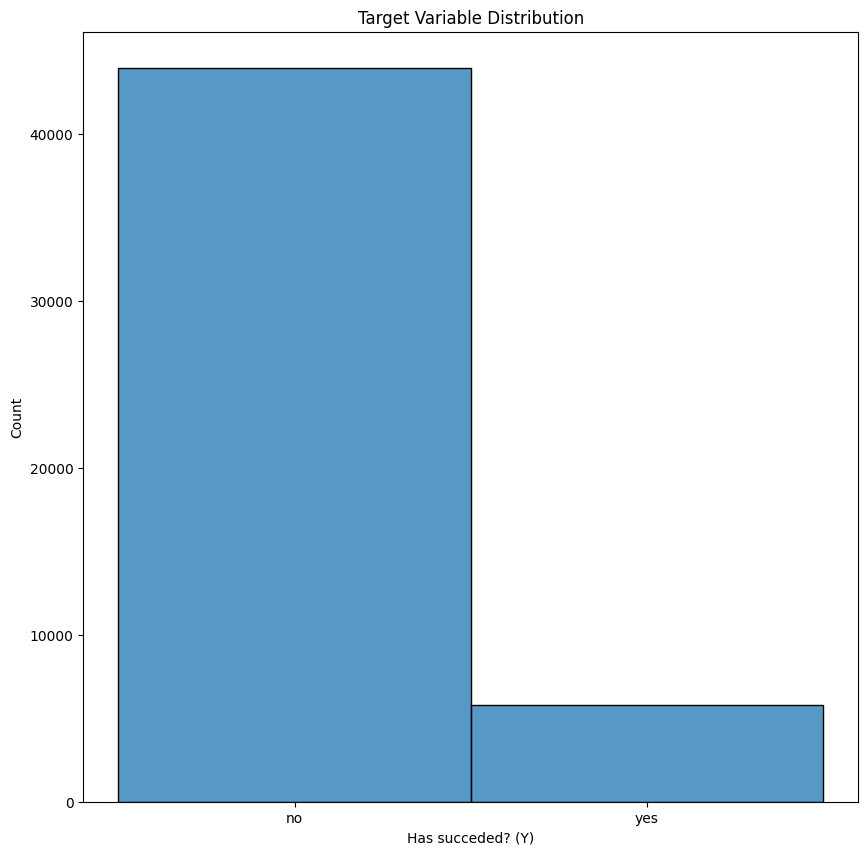

In [593]:
plt.figure(figsize=(10, 10))
sns.histplot(data=marketing_data, x='y', multiple='stack')
plt.title('Target Variable Distribution')
plt.xlabel('Has succeded? (Y)')
plt.ylabel('Count')
plt.show()

**There are a lot more clients that didn't subscribed to a term deposit**

In [594]:
# Checking the numbers on the distribution
marketing_data['y'].value_counts()

no     43922
yes     5810
Name: y, dtype: int64

## General Insights
- A higher proportion of people subscribed to a term deposit is observed in people without credit on default.
- Slightly higher proportion of people who accepted the term deposit on people without a house loan.
- Doesn't seem to be much benefit in contacting people who didn't take the term deposit before again.
- Previous campaign success cases, seem to have a higher success rate, which means contacting clients that took term deposits before could be beneficial.
- There is a big imbalance on the ratio of people who took and didn't take the term deposit.

## Data Pre-Processing

In [595]:
# Checking the diferent categories in text columns
for column in marketing_data.select_dtypes(include="object"):
    print(marketing_data[column].value_counts())
    print('-'*100)

blue-collar      10678
management       10427
technician        8365
admin.            5649
services          4571
retired           2494
self-employed     1762
entrepreneur      1655
unemployed        1431
housemaid         1352
student           1022
unknown            326
Name: job, dtype: int64
----------------------------------------------------------------------------------------------------
married     30011
single      13986
divorced     5735
Name: marital, dtype: int64
----------------------------------------------------------------------------------------------------
secondary    25508
tertiary     14651
primary       7529
unknown       2044
Name: education, dtype: int64
----------------------------------------------------------------------------------------------------
no     48841
yes      891
Name: default, dtype: int64
----------------------------------------------------------------------------------------------------
yes    27689
no     22043
Name: housing, dtype: int64


In [596]:
# Separating text and numbers
marketing_data_numbers = marketing_data.select_dtypes(include='number')
marketing_data_text = marketing_data.select_dtypes(include='object')

In [597]:
print(marketing_data_numbers.shape, marketing_data_text.shape)

(49732, 7) (49732, 10)


In [598]:
marketing_data_numbers.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [599]:
marketing_data_text.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


### Number processing

For numbers StandardEncoder will be used

In [600]:
numbers_scaler = StandardScaler() 

In [601]:
numbers_scaler.fit(marketing_data_numbers)

StandardScaler()

In [602]:
marketing_data_numbers_scaled = pd.DataFrame(data=numbers_scaler.transform(marketing_data_numbers), columns=marketing_data_numbers.columns)

In [603]:
marketing_data_numbers_scaled.head()

,age,balance,day,duration,campaign,pdays,previous
0,1.605529,0.254880,-1.300726,0.008962,-0.57003,-0.411068,-0.255849
1,0.286628,-0.440154,-1.300726,-0.417824,-0.57003,-0.411068,-0.255849
2,-0.749651,-0.449031,-1.300726,-0.708814,-0.57003,-0.411068,-0.255849
3,0.569250,0.045450,-1.300726,-0.646736,-0.57003,-0.411068,-0.255849
4,-0.749651,-0.449359,-1.300726,-0.235470,-0.57003,-0.411068,-0.255849


### Text Processing

In [604]:
# First the column y will be separated as is the target column
target_column = marketing_data_text['y']
marketing_data_text_features = marketing_data_text.drop(columns='y', axis=1)

In [605]:
target_column.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [606]:
marketing_data_text_features.head()

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown


In [607]:
text_encoders = [LabelEncoder() for column in marketing_data_text_features.columns]
print(text_encoders)

[LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder()]


In [608]:
marketing_data_text_features_encoded = pd.DataFrame()

In [609]:
for index, encoder in enumerate(text_encoders):
    column_name = marketing_data_text_features.columns[index]
    marketing_data_text_features_encoded[column_name] = encoder.fit_transform(marketing_data_text_features.iloc[:, index])

In [610]:
marketing_data_text_features_encoded.head()

,job,marital,education,default,housing,loan,contact,month,poutcome
0,4,1,2,0,1,0,2,8,3
1,9,2,1,0,1,0,2,8,3
2,2,1,1,0,1,1,2,8,3
3,1,1,3,0,1,0,2,8,3
4,11,2,3,0,0,0,2,8,3


In [611]:
# Checking the inverse transform on the job encoder
print(text_encoders[0].inverse_transform(marketing_data_text_features_encoded['job']))

['management' 'technician' 'entrepreneur' ... 'technician' 'blue-collar'
 'entrepreneur']


In [612]:
# Checking values in target column
target_column.value_counts()

no     43922
yes     5810
Name: y, dtype: int64

In [613]:
# Replacing the values
target_column.replace({'no': 0, 'yes': 1}, inplace=True)

In [614]:
target_column.value_counts()

0    43922
1     5810
Name: y, dtype: int64

0 $\longrightarrow$ Not subscribed to term deposit  
1 $\longrightarrow$ Subscribed to term deposit

### Concatenating the numbers and text dataframes

In [615]:
marketing_data_preprocessed = pd.concat([marketing_data_numbers_scaled, marketing_data_text_features_encoded, target_column], axis=1)

In [616]:
marketing_data_preprocessed.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,1.605529,0.254880,-1.300726,0.008962,-0.57003,-0.411068,-0.255849,4,1,2,0,1,0,2,8,3,0
1,0.286628,-0.440154,-1.300726,-0.417824,-0.57003,-0.411068,-0.255849,9,2,1,0,1,0,2,8,3,0
2,-0.749651,-0.449031,-1.300726,-0.708814,-0.57003,-0.411068,-0.255849,2,1,1,0,1,1,2,8,3,0
3,0.569250,0.045450,-1.300726,-0.646736,-0.57003,-0.411068,-0.255849,1,1,3,0,1,0,2,8,3,0
4,-0.749651,-0.449359,-1.300726,-0.235470,-0.57003,-0.411068,-0.255849,11,2,3,0,0,0,2,8,3,0


In [617]:
marketing_data_preprocessed.tail()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
49727,-0.749651,-0.559171,1.705673,0.272793,0.720691,-0.411068,-0.255849,7,1,1,0,1,0,0,5,3,0
49728,1.511321,-1.538925,-0.819703,-0.410064,-0.570030,-0.411068,-0.255849,6,1,2,1,1,1,2,8,3,0
49729,1.511321,-0.352699,0.382857,-0.417824,2.656772,-0.411068,-0.255849,9,1,1,0,0,0,0,1,3,0
49730,-1.220687,-0.075869,-1.180470,-0.503181,0.398010,1.706262,1.074637,1,1,1,0,0,0,0,3,1,0
49731,0.286628,-0.076198,-1.541238,0.334871,-0.247350,2.085783,2.848619,2,2,2,0,1,1,0,0,1,0


## Creating a balanced dataset

There are 43922 non subscribed clients and 5810 subscribed clients. To avoid problems with the model training, we will be creating a new balanced dataset taking the 5810 subscribed clients and a sample of 5810 non subscribed clients.

In [618]:
subscribed = marketing_data_preprocessed.loc[marketing_data_preprocessed['y'] == 1]
non_subscribed = marketing_data_preprocessed.loc[marketing_data_preprocessed['y'] == 0]

In [619]:
print(subscribed.shape, non_subscribed.shape)

(5810, 17) (43922, 17)


In [620]:
non_subscribed_sample = non_subscribed.sample(n=5810, random_state=0)

In [621]:
balanced_marketing_data = pd.concat([subscribed, non_subscribed_sample], axis=0, ignore_index=True)

In [622]:
balanced_marketing_data.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,1.699736,0.320636,-1.300726,3.039141,-0.57003,-0.411068,-0.255849,0,1,1,0,1,0,2,8,3,1
1,1.417114,-0.434893,-1.300726,4.688086,-0.57003,-0.411068,-0.255849,0,1,1,0,0,0,2,8,3,1
2,0.004006,-0.032142,-1.300726,4.385456,-0.57003,-0.411068,-0.255849,9,1,1,0,1,0,2,8,3,1
3,1.322907,0.364363,-1.300726,1.242761,-0.57003,-0.411068,-0.255849,7,1,1,0,1,0,2,8,3,1
4,1.228700,-0.389193,-1.300726,1.607468,-0.24735,-0.411068,-0.255849,0,1,2,0,0,0,2,8,3,1


In [623]:
balanced_marketing_data.tail()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
11615,0.851871,-0.449688,-0.458935,0.303832,-0.570030,2.175670,2.405123,9,1,2,0,0,1,0,0,0,0
11616,-1.409101,7.539257,-0.338679,1.727744,-0.570030,-0.411068,-0.255849,9,2,1,0,1,0,2,8,3,0
11617,-0.090201,-0.180420,-0.338679,-0.809691,0.075330,-0.411068,-0.255849,9,1,0,0,1,0,2,8,3,0
11618,0.098214,-0.368480,1.825929,-0.708814,0.720691,-0.411068,-0.255849,0,1,1,0,1,0,0,5,3,0
11619,1.134493,-0.298780,-0.218423,0.226235,1.043371,1.516501,0.187646,0,1,1,0,0,0,0,10,2,0


In [624]:
balanced_marketing_data.shape

(11620, 17)

In [625]:
balanced_marketing_data['y'].value_counts()

1    5810
0    5810
Name: y, dtype: int64

## Splitting features and label

In [626]:
X = balanced_marketing_data.drop(columns='y')
Y = balanced_marketing_data['y']

In [627]:
print(X)

            age   balance       day  duration  campaign     pdays  previous  \
0      1.699736  0.320636 -1.300726  3.039141 -0.570030 -0.411068 -0.255849   
1      1.417114 -0.434893 -1.300726  4.688086 -0.570030 -0.411068 -0.255849   
2      0.004006 -0.032142 -1.300726  4.385456 -0.570030 -0.411068 -0.255849   
3      1.322907  0.364363 -1.300726  1.242761 -0.570030 -0.411068 -0.255849   
4      1.228700 -0.389193 -1.300726  1.607468 -0.247350 -0.411068 -0.255849   
...         ...       ...       ...       ...       ...       ...       ...   
11615  0.851871 -0.449688 -0.458935  0.303832 -0.570030  2.175670  2.405123   
11616 -1.409101  7.539257 -0.338679  1.727744 -0.570030 -0.411068 -0.255849   
11617 -0.090201 -0.180420 -0.338679 -0.809691  0.075330 -0.411068 -0.255849   
11618  0.098214 -0.368480  1.825929 -0.708814  0.720691 -0.411068 -0.255849   
11619  1.134493 -0.298780 -0.218423  0.226235  1.043371  1.516501  0.187646   

       job  marital  education  default  housing  l

In [628]:
print(Y)

0        1
1        1
2        1
3        1
4        1
        ..
11615    0
11616    0
11617    0
11618    0
11619    0
Name: y, Length: 11620, dtype: int64


## Model Selection

In [633]:
# List of models
models = [LogisticRegression(max_iter=1000), KNeighborsClassifier(), DecisionTreeClassifier(random_state=0)]

In [634]:
models_hyperparameters = {
    'Log_Reg': {
        'C': [1, 5, 10, 20]
    },
    
    'KNN': {
        'n_neighbors': [3, 5, 10],
        'p': [1, 2, 3]
    },
    'Decision_Tree': {
        'criterion': ['gini', 'entropy', 'log_loss']
    }
}

In [635]:
def model_selection(list_of_models, hyperparameters_dictionary):
    model_keys = list(models_hyperparameters.keys())
    result = []
    for index, model in enumerate(list_of_models):
        key = model_keys[index]
        parameters = hyperparameters_dictionary[key]
        
        print(model)
        print(parameters)
        print('-' * 120)
        
        # Train Classifier
        classifier = GridSearchCV(model, parameters, cv=5)
        classifier.fit(X, Y)
        
        # Storing the result
        result.append({
            'model used': model,
            'highest score': classifier.best_score_,
            'best hyperparameters': classifier.best_params_
        })
    result_dataframe = pd.DataFrame(result, columns=['model used', 'highest score', 'best hyperparameters'])
    return result_dataframe
        

In [636]:
model_selection(models, models_hyperparameters)

LogisticRegression(max_iter=1000)
{'C': [1, 5, 10, 20]}
------------------------------------------------------------------------------------------------------------------------
KNeighborsClassifier()
{'n_neighbors': [3, 5, 10], 'p': [1, 2, 3]}
------------------------------------------------------------------------------------------------------------------------
DecisionTreeClassifier(random_state=0)
{'criterion': ['gini', 'entropy', 'log_loss']}
------------------------------------------------------------------------------------------------------------------------


,model used,highest score,best hyperparameters
0,LogisticRegression(max_iter=1000),0.769707,{'C': 5}
1,KNeighborsClassifier(),0.744664,"{'n_neighbors': 5, 'p': 3}"
2,DecisionTreeClassifier(random_state=0),0.747935,{'criterion': 'gini'}


Based on the accuracies score on the cross validations, the model selected is **Logistic Regression** with **C = 5**

## Accuracy Score, Precision, Recall & F1 Score for Selected Model

In [637]:
selected_model = LogisticRegression(C=5, max_iter=1000)

In [638]:
# Accuracy
accuracy_score = cross_val_score(selected_model, X, Y, cv=5, scoring='accuracy')
mean_accuracy = np.mean(accuracy_score)
mean_accuracy = mean_accuracy * 100
mean_accuracy = round(mean_accuracy, 2)
print(f'Cross validations accuracies for model {selected_model}: {accuracy_score}')
print(f'Accuracy score for the model {selected_model}: {mean_accuracy}%')

Cross validations accuracies for model LogisticRegression(C=5, max_iter=1000): [0.7327883  0.72891566 0.78614458 0.79130809 0.80938038]
Accuracy score for the model LogisticRegression(C=5, max_iter=1000): 76.97%


In [639]:
# Precision
precision_score = cross_val_score(selected_model, X, Y, cv=5, scoring='precision')
mean_precision = np.mean(precision_score)
mean_precision = mean_precision * 100
mean_precision = round(mean_precision, 2)
print(f'Cross validations precision for model {selected_model}: {precision_score}')
print(f'Precision score for the model {selected_model}: {mean_precision}%')

Cross validations precision for model LogisticRegression(C=5, max_iter=1000): [0.76236663 0.77708333 0.80036134 0.81784038 0.79637263]
Precision score for the model LogisticRegression(C=5, max_iter=1000): 79.08%


In [640]:
# Recall
recall_score = cross_val_score(selected_model, X, Y, cv=5, scoring='recall')
mean_recall = np.mean(recall_score)
mean_recall = mean_recall * 100
mean_recall = round(mean_recall, 2)
print(f'Cross validations recall for model {selected_model}: {recall_score}')
print(f'Recall score for the model {selected_model}: {mean_recall}%')

Cross validations recall for model LogisticRegression(C=5, max_iter=1000): [0.67641997 0.64199656 0.76247849 0.74956971 0.8313253 ]
Recall score for the model LogisticRegression(C=5, max_iter=1000): 73.24%


In [641]:
# F1 Score
f1_score = cross_val_score(selected_model, X, Y, cv=5, scoring='f1')
mean_f1 = np.mean(f1_score)
mean_f1 = mean_recall * 100
mean_f1 = round(mean_recall, 2)
print(f'Cross validations F1 Score for model {selected_model}: {f1_score}')
print(f'F1 score for the model {selected_model}: {mean_f1}%')

Cross validations F1 Score for model LogisticRegression(C=5, max_iter=1000): [0.71682627 0.70311027 0.78096078 0.78221823 0.81347368]
F1 score for the model LogisticRegression(C=5, max_iter=1000): 73.24%


**The metrics are good, so the Logistic Regression model is selected**

## Model Training

In [642]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

In [643]:
print(X.shape, X_train.shape, X_test.shape)

(11620, 16) (9296, 16) (2324, 16)


In [644]:
selected_model.fit(X_train, Y_train)

LogisticRegression(C=5, max_iter=1000)

In [647]:
# Prediction on training data
Y_predicted_train = selected_model.predict(X_train)
accuracy_on_training_data = accuracy_score(Y_train, Y_predicted_train)
precision_on_training_data = precision_score(Y_train, Y_predicted_train)
recall_on_training_data = recall_score(Y_train, Y_predicted_train)
f1_on_training_data = f1_score(Y_train, Y_predicted_train)

In [648]:
print(f"Accuracy on training data is {round(accuracy_on_training_data * 100, 2)}")
print(f"Precision on training data is {round(precision_on_training_data * 100, 2)}")
print(f"Recall on training data is {round(recall_on_training_data * 100, 2)}")
print(f"F1 Score on training data is {round(f1_on_training_data * 100, 2)}")

Accuracy on training data is 80.57
Precision on training data is 80.86
Recall on training data is 80.1
F1 Score on training data is 80.48


In [649]:
# Prediction on test data
Y_predicted_test = selected_model.predict(X_test)
accuracy_on_test_data = accuracy_score(Y_test, Y_predicted_test)
precision_on_test_data = precision_score(Y_test, Y_predicted_test)
recall_on_test_data = recall_score(Y_test, Y_predicted_test)
f1_on_test_data = f1_score(Y_test, Y_predicted_test)

In [650]:
print(f"Accuracy on test data is {round(accuracy_on_test_data * 100, 2)}")
print(f"Precision on test data is {round(precision_on_test_data * 100, 2)}")
print(f"Recall on test data is {round(recall_on_test_data * 100, 2)}")
print(f"F1 Score on test data is {round(f1_on_test_data * 100, 2)}")

Accuracy on test data is 79.3
Precision on test data is 79.28
Recall on test data is 79.35
F1 Score on test data is 79.31


## Confusion Matrix

In [651]:
cf_matrix = confusion_matrix(Y_test, Y_predicted_test)
print(cf_matrix)

[[921 241]
 [240 922]]


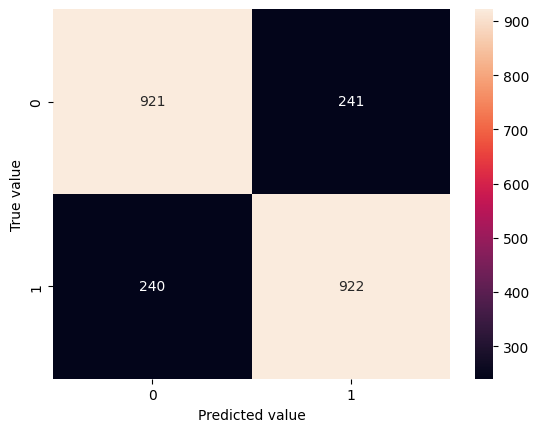

In [652]:
sns.heatmap(cf_matrix, annot=True, fmt="g")
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.show()

In [653]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
columns = ['Cross Validation', 'Train Test Split']
cross_validation_metrics = [mean_accuracy, mean_precision, mean_recall, mean_f1]
train_test_metrics = [round(accuracy_on_test_data * 100, 2), round(precision_on_test_data * 100, 2), round(recall_on_test_data * 100, 2), round(f1_on_test_data * 100, 2)]
metrics_df = pd.DataFrame(data={'Cross Validation': cross_validation_metrics, 'Train Test Split': train_test_metrics}, columns=columns, index=metrics)

In [654]:
metrics_df.head()

,Cross Validation,Train Test Split
Accuracy,76.97,79.30
Precision,79.08,79.28
Recall,73.24,79.35
F1-Score,73.24,79.31


The metrics on train test split seem consistent with the cross validation, so the model is considered trained.

## Predictive System

In [665]:
# Simulated input
selected_row = 83
input_client = marketing_data.iloc[[selected_row], :-1]
# Separating text and number columns
input_data_numbers = input_client.select_dtypes(include='number')
input_data_text = input_client.select_dtypes(include='object')
# Scaling the numbers
input_data_numbers_scaled = pd.DataFrame(data=numbers_scaler.transform(input_data_numbers), columns=input_data_numbers.columns)
# Text processing
input_data_text_encoded = pd.DataFrame()
for index, encoder in enumerate(text_encoders):
    column_name = input_data_text.columns[index]
    input_data_text_encoded[column_name] = encoder.fit_transform(input_data_text.iloc[:, index])
# Concatenating text and numbers
input_data_preprocessed = pd.concat([input_data_numbers_scaled, input_data_text_encoded], axis=1)
# Prediction
prediction = selected_model.predict(input_data_preprocessed)

print(marketing_data.iloc[selected_row, :])

if prediction[0] == 0:
    print('The client is not likely to take a term deposit.')
else:
    print('The client is likely to take a term deposit.')


age                 59
job             admin.
marital        married
education    secondary
default             no
balance           2343
housing            yes
loan                no
contact        unknown
day                  5
month              may
duration          1042
campaign             1
pdays               -1
previous             0
poutcome       unknown
y                  yes
Name: 83, dtype: object
The client is likely to take a term deposit.


## Files for Django App

First list with the possible options for categorical values will be generated.

In [666]:
possible_job = marketing_data['job'].unique().tolist()
print(possible_job)

['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', 'retired', 'admin.', 'services', 'self-employed', 'unemployed', 'housemaid', 'student']


In [667]:
possible_marital = marketing_data['marital'].unique().tolist()
print(possible_marital)

['married', 'single', 'divorced']


In [668]:
possible_default = marketing_data['default'].unique().tolist()
print(possible_default)

['no', 'yes']


In [669]:
possible_housing = marketing_data['housing'].unique().tolist()
print(possible_housing)

['yes', 'no']


In [670]:
possible_loan = marketing_data['loan'].unique().tolist()
print(possible_loan)

['no', 'yes']


In [671]:
possible_contact = marketing_data['contact'].unique().tolist()
print(possible_contact)

['unknown', 'cellular', 'telephone']


In [680]:
possible_month = marketing_data['month'].unique().tolist()


In [682]:
# Could have just used possible_month = month_order, but I wanted a general formula in case not all the months were present.
possible_month = sorted(possible_month, key=lambda x: month_order.index(x))
print(possible_month)

['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']


In [677]:
possible_poutcome = marketing_data['poutcome'].unique().tolist()
print(possible_poutcome)

['unknown', 'failure', 'other', 'success']


In [683]:
form_input_data = {
    'possible_job': possible_job,
    'possible_marital': possible_marital,
    'possible_default': possible_default,
    'possible_housing': possible_housing,
    'possible_loan': possible_loan,
    'possible_contact': possible_contact,
    'possible_month': possible_month,
    'possible_poutcome': possible_poutcome
}

In [691]:
# Original columns (minus the target column) to generate dataframe following the same prediction procedure.
input_data_columns = marketing_data.columns.tolist()[:-1]
print(input_data_columns)

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']


### Generating pickle files

In [684]:
pd.to_pickle(form_input_data, 'pickle_files/form_input_data.pickle')

In [685]:
pd.to_pickle(selected_model, 'pickle_files/selected_model.pickle')

In [686]:
pd.to_pickle(numbers_scaler, 'pickle_files/numbers_scaler.pickle')

In [687]:
pd.to_pickle(text_encoders, 'pickle_files/text_encoders.pickle')

In [692]:
pd.to_pickle(input_data_columns, 'pickle_files/input_data_columns.pickle')

In [694]:
# csv with semicolon for easier testing
marketing_data.to_csv(sep=';', path_or_buf='dataset/marketing_data_semicolon.csv', index=False)